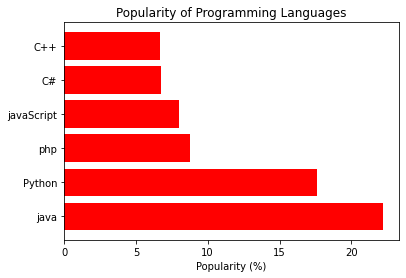

In [1]:
import matplotlib.pyplot as plt

# Data for the programming languages and their popularity
languages = ['java', 'Python', 'php', 'javaScript', 'C#','C++']
popularity = [22.2, 17.6, 8.8, 8, 6.77, 6.7]  # Example popularity percentages

# Create a horizontal bar chart
plt.barh(languages, popularity, color='red')

# Add titles and labels
plt.xlabel('Popularity (%)')
plt.title('Popularity of Programming Languages')

# Show the plot
plt.show()

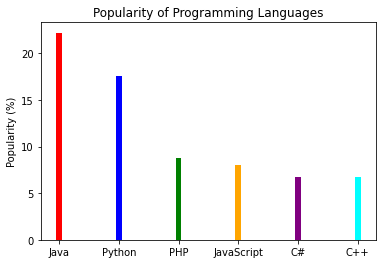

In [2]:
import matplotlib.pyplot as plt

# Data for the programming languages and their popularity
languages = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8.0, 6.77, 6.7]  # Example popularity percentages

# Set colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a vertical bar chart
plt.bar(languages, popularity, color=colors, width=0.1)  # Set width for bars

# Add titles and labels
plt.ylabel('Popularity (%)')
plt.title('Popularity of Programming Languages')

# Show the plot
plt.show()


In [9]:
import pandas as pd

df = pd.read_csv('iris.csv')

print(df) 

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


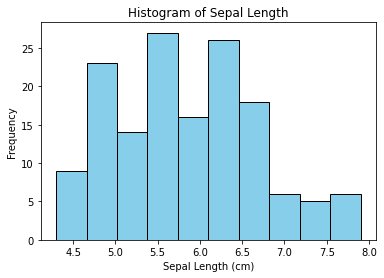

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create a histogram for sepal length
plt.hist(iris_df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

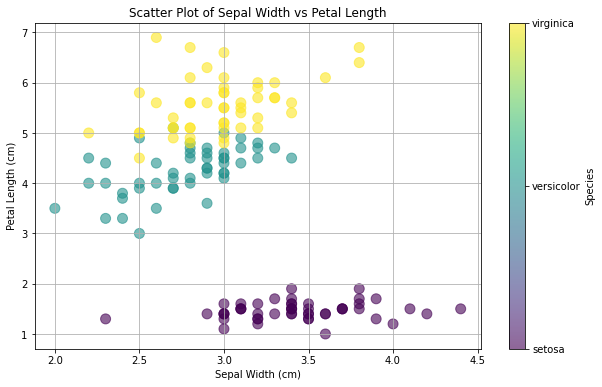

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
iris_df['species'] = iris.target

# Map numeric targets to species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal length (cm)'], 
            c=iris_df['species'].astype('category').cat.codes, 
            cmap='viridis', 
            s=100, 
            alpha=0.6)

plt.title('Scatter Plot of Sepal Width vs Petal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.colorbar(ticks=[0, 1, 2], label='Species', 
             format=plt.FuncFormatter(lambda x, _: ['setosa', 'versicolor', 'virginica'][int(x)]))
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('wisc_bc_data.csv')

# Check the first few rows of the dataset
print(data.head())

# Assuming the last column contains the label (diagnosis)
# Replace 'diagnosis' with the correct column name if different
X = data.iloc[:, 2:32]  # Features (from 2nd to 31st column)
y = data['diagnosis'].map({'B': 0, 'M': 1})  # Map B (Benign) to 0 and M (Malignant) to 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the K-NN classifier
k = 5  # You can choose a different value for k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def main():
    # Prompt user for dataset path
    dataset_path = input("Please enter the path to the dataset (CSV file): \n")

    # Load the dataset
    data = pd.read_csv(dataset_path)

    # Display the first few rows of the dataset
    print("Dataset loaded successfully. Here are the first few rows:")
    print(data.head())

    # Assume the last column is the label
    # Adjust this if your dataset has a different structure
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Labels

    # Encode labels if they are categorical
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

if __name__ == "__main__":
    main()

Please enter the path to the dataset (CSV file): 
iris.csv
Dataset loaded successfully. Here are the first few rows:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

